# Mean Variance Optimization
You’re an investment analyst at a large fund. You specialize in calculating efficient frontiers and selecting assets for portfolios.

This project is split into three tasks, each with its own Python file:

1. Follow the steps to calculate the efficient frontier of a portfolio with five assets (script1.py)
2. See how two additional assets affect the efficient frontier from part one (script2.py)
3. Use the covariance matrix and expected returns from ten assets to select the five assets that produce the best efficient frontier (script3.py)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from rf import return_portfolios
from op import optimal_portfolio
import numpy as np

In [4]:
# 1. Load the stock data
stock_data=pd.read_csv('stock_data_weak.csv',index_col='Date')
print(stock_data.head())

            General Electric  Chesapeake Energy   AT&T  Cisco Systems  \
Date                                                                    
2007-12-31             37.08              39.36  42.12          27.25   
2008-03-31             36.63              45.76  37.71          24.08   
2008-06-30             26.35              66.77  32.75          23.47   
2008-09-30             23.87              33.29  28.35          22.25   
2008-12-31             15.82              15.34  28.19          16.18   

            Campbell Soup  
Date                       
2007-12-31          35.77  
2008-03-31          33.91  
2008-06-30          33.03  
2008-09-30          38.30  
2008-12-31          29.49  


In [6]:
# 2. Find the quarterly return for each period
selected_cols = list(stock_data.columns[1:])
print(selected_cols)
returns_quarterly=stock_data[selected_cols].pct_change(4)
print(returns_quarterly.tail())

['Chesapeake Energy', 'AT&T', 'Cisco Systems', 'Campbell Soup']
            Chesapeake Energy      AT&T  Cisco Systems  Campbell Soup
Date                                                                 
2017-03-31           0.468514  0.060122       0.181914      -0.107728
2017-06-30           0.138952 -0.116186       0.120155      -0.172490
2017-09-30          -0.292007 -0.047910       0.053780      -0.137527
2017-12-31          -0.429371 -0.082788       0.256872      -0.204333
2018-03-31          -0.480274 -0.166068       0.319395      -0.256693


In [12]:
# 3. Find the expected returns 
expected_returns = returns_quarterly.mean()
print(expected_returns)

Chesapeake Energy   -0.108620
AT&T                 0.019351
Cisco Systems        0.069655
Campbell Soup        0.045642
dtype: float64


In [10]:
# 4. Find the covariance 
cov_quarterly = returns_quarterly.cov()
cov_quarterly.style

,Chesapeake Energy,AT&T,Cisco Systems,Campbell Soup
Chesapeake Energy,0.189190,0.018909,0.020672,0.009616
AT&T,0.018909,0.022289,0.003922,0.011769
Cisco Systems,0.020672,0.003922,0.050978,0.014155
Campbell Soup,0.009616,0.011769,0.014155,0.029855


In [14]:
# 5. Find a set of random portfolios
random_portfolios = return_portfolios(expected_returns, cov_quarterly)
random_portfolios.head().style

,Returns,Volatility,Chesapeake Energy Weight,AT&T Weight,Cisco Systems Weight,Campbell Soup Weight
0,0.021979,0.153566,0.154844,0.358552,0.401860,0.084744
1,0.002786,0.177882,0.283601,0.100565,0.147294,0.468540
2,0.034548,0.150173,0.104026,0.107441,0.323923,0.464609
3,0.056273,0.188700,0.039810,0.058980,0.763031,0.138179
4,-0.026024,0.213765,0.401980,0.460648,0.102217,0.035155


In [15]:
random_portfolios.sort_values('Returns', ascending=False, inplace=True)
random_portfolios.reset_index(drop=True).head().round(4).style

,Returns,Volatility,Chesapeake Energy Weight,AT&T Weight,Cisco Systems Weight,Campbell Soup Weight
0,0.065600,0.206400,0.005500,0.008100,0.877300,0.109200
1,0.059700,0.176900,0.005100,0.048000,0.671500,0.275400
2,0.058900,0.179600,0.002000,0.161800,0.741700,0.094500
3,0.057100,0.167800,0.010000,0.001700,0.542900,0.445400
4,0.056500,0.164500,0.005500,0.072900,0.566600,0.355100


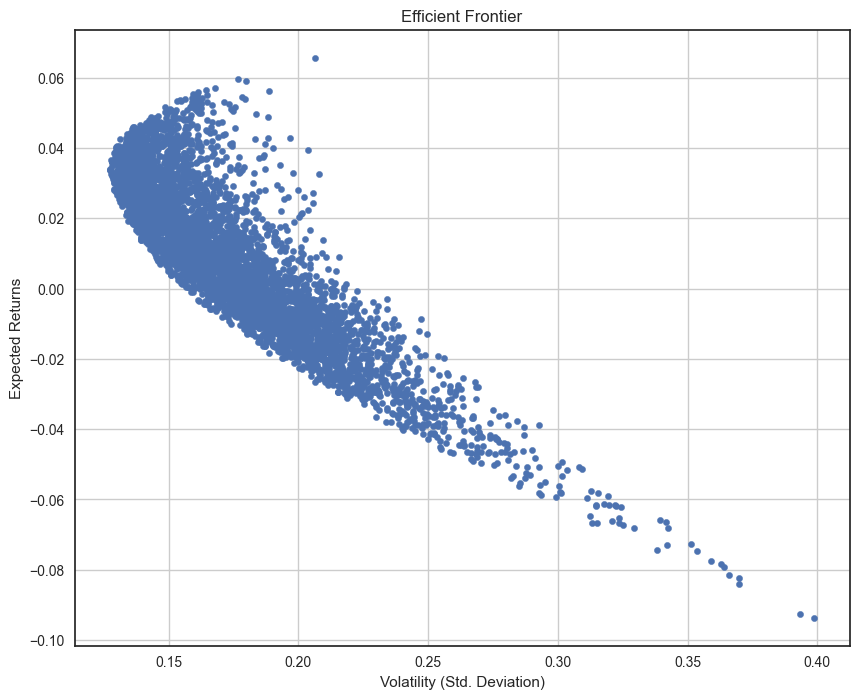

In [19]:
# plot returns against volatility
plt.style.use('seaborn-v0_8-white')
random_portfolios.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.show()